In [161]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats import shapiro,levene
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from statsmodels.stats import weightstats as stests

# 1.

## Reading the Data

In [2]:
fifa=pd.read_csv(r'D:\Supernatural\D\Statistics\Stats_mini\Stats_mini\Set-A\fifa_stats.csv')

In [3]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
fifa.shape

(2000, 15)

## Understanding the categorical and numerical variables

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [6]:
cat=fifa.select_dtypes(exclude='number').columns
print("There are",len(cat),"categorical columns:",list(cat))

There are 6 categorical columns: ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Position']


In [7]:
num=fifa.select_dtypes(include='number').columns
print("There are",len(num),"numerical columns:",list(num))

There are 9 numerical columns: ['Age', 'Overall_rating', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight']


In [8]:
fifa.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


## For checking how many unique values each variable contains

In [9]:
fifa.nunique()

Name                        1970
Age                           24
Nationality                   95
Overall_rating                19
Potential                     21
Club                         285
Preferred Foot                 2
International Reputation       5
Weak Foot                      5
Skill Moves                    5
Work Rate                      8
Position                      27
Jersey Number                 67
Height                        17
Weight                        47
dtype: int64

## Checking the null values in the dataset

In [10]:
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

## Measures of Central Tendency

In [11]:
fifa.mean()

Age                          27.231500
Overall_rating               78.197000
Potential                    80.303500
International Reputation      1.774500
Weak Foot                     3.204000
Skill Moves                   2.919500
Jersey Number                15.205500
Height                        5.781042
Weight                      169.478000
dtype: float64

In [12]:
fifa.median()

Age                          27.0
Overall_rating               77.0
Potential                    80.0
International Reputation      2.0
Weak Foot                     3.0
Skill Moves                   3.0
Jersey Number                12.0
Height                        6.0
Weight                      170.0
dtype: float64

In [13]:
fifa.mode().head(1)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,Danilo,28.0,Spain,75.0,76.0,Chelsea,Right,1.0,3.0,3.0,Medium/ Medium,GK,10.0,5.083333,165.0


In [14]:
## Measures of Dispersion

In [15]:
fifa[num].max()

Age                          41.000000
Overall_rating               94.000000
Potential                    95.000000
International Reputation      5.000000
Weak Foot                     5.000000
Skill Moves                   5.000000
Jersey Number                99.000000
Height                        6.583333
Weight                      227.000000
dtype: float64

In [16]:
fifa[num].min()

Age                          17.000000
Overall_rating               75.000000
Potential                    75.000000
International Reputation      1.000000
Weak Foot                     1.000000
Skill Moves                   1.000000
Jersey Number                 1.000000
Height                        5.083333
Weight                      123.000000
dtype: float64

In [17]:
fifa[num].max()-fifa[num].min()

Age                          24.0
Overall_rating               19.0
Potential                    20.0
International Reputation      4.0
Weak Foot                     4.0
Skill Moves                   4.0
Jersey Number                98.0
Height                        1.5
Weight                      104.0
dtype: float64

In [18]:
fifa[num].var()

Age                          14.892354
Overall_rating               10.797590
Potential                    16.925851
International Reputation      0.658979
Weak Foot                     0.530649
Skill Moves                   0.929484
Jersey Number               174.517529
Height                        0.196548
Weight                      257.612322
dtype: float64

In [19]:
fifa[num].std()

Age                          3.859061
Overall_rating               3.285969
Potential                    4.114104
International Reputation     0.811775
Weak Foot                    0.728457
Skill Moves                  0.964098
Jersey Number               13.210508
Height                       0.443337
Weight                      16.050306
dtype: float64

In [20]:
Q1=np.quantile(fifa[num],0.25)
Q3=np.quantile(fifa[num],0.75)
IQR=Q3-Q1
IQR

74.0

In [21]:
from scipy.stats import variation  
for i in fifa[num]:
    print(i,":", scipy.stats.variation(fifa[i],nan_policy='omit'))

Age : 0.1416777037406235
Overall_rating : 0.0420111644778335
Potential : 0.0512191276610682
International Reputation : 0.45735271545052536
Weak Foot : 0.22730170832014832
Skill Moves : 0.3301444446497748
Jersey Number : 0.8685807912278304
Height : 0.07666894467641032
Weight : 0.0946806836593331


## Getting count of all the columns in the data

In [22]:
fifa['Age'].value_counts()

28    192
26    187
27    185
25    176
30    164
29    163
24    156
23    133
31    130
22    102
32     92
21     77
33     73
34     62
20     34
35     23
19     15
36     14
37     12
18      3
40      3
39      2
41      1
17      1
Name: Age, dtype: int64

In [23]:
fifa['Nationality'].value_counts()

Spain                 251
Brazil                198
France                161
Argentina             143
Germany               126
                     ... 
Dominican Republic      1
Bulgaria                1
Syria                   1
Tanzania                1
Mozambique              1
Name: Nationality, Length: 95, dtype: int64

In [24]:
fifa['Overall_rating'].value_counts()

75    429
76    373
77    304
79    171
78    168
80    143
82     94
81     93
83     70
84     45
85     33
86     22
88     17
87     13
89     11
91      6
90      5
94      2
92      1
Name: Overall_rating, dtype: int64

In [25]:
fifa['Potential'].value_counts()

76    224
77    217
75    212
80    193
79    154
78    145
81    143
83    137
82    129
84    110
85     96
86     66
87     52
88     41
89     31
90     21
91     12
92      9
93      4
94      3
95      1
Name: Potential, dtype: int64

In [26]:
fifa['Club'].value_counts()

Chelsea                    24
Borussia Dortmund          23
Liverpool                  23
Napoli                     23
Manchester United          23
                           ..
Nagoya Grampus              1
Houston Dynamo              1
Legia Warszawa              1
Junior FC                   1
Real Sporting de GijÃ³n     1
Name: Club, Length: 285, dtype: int64

In [27]:
fifa['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [28]:
fifa['International Reputation'].value_counts()

1    866
2    782
3    295
4     51
5      6
Name: International Reputation, dtype: int64

In [29]:
fifa['Weak Foot'].value_counts()

3    1072
4     580
2     276
5      62
1      10
Name: Weak Foot, dtype: int64

In [30]:
fifa['Skill Moves'].value_counts()

3    828
4    544
2    395
1    194
5     39
Name: Skill Moves, dtype: int64

In [31]:
fifa['Work Rate'].value_counts()

Medium/ Medium    733
High/ Medium      514
Medium/ High      264
High/ High        245
Medium/ Low        94
High/ Low          88
Low/ High          38
Low/ Medium        24
Name: Work Rate, dtype: int64

In [32]:
fifa['Position'].value_counts()

GK     194
ST     187
RM     133
CB     130
CAM    126
LM     120
CM     119
LB     110
LCB    107
RB     105
RCB    103
CDM     98
RCM     77
LCM     77
LS      50
RDM     49
RW      45
LW      43
RS      40
LDM     33
LWB     15
RWB     11
CF      11
LF       6
RF       5
RAM      3
LAM      3
Name: Position, dtype: int64

In [33]:
fifa['Jersey Number'].value_counts()

10    125
8     107
1      95
7      95
11     91
     ... 
71      1
66      1
60      1
50      1
63      1
Name: Jersey Number, Length: 67, dtype: int64

In [34]:
fifa['Height'].value_counts()

5.083333    470
6.000000    311
6.166667    268
5.750000    231
6.083333    222
6.250000    109
5.666667    100
6.333333    100
5.583333     89
6.416667     36
5.500000     25
6.500000     14
5.416667     14
5.333333      4
5.250000      3
6.583333      3
5.166667      1
Name: Height, dtype: int64

In [35]:
fifa['Weight'].value_counts()

165    130
176    122
154    115
172    115
168    110
163    100
159     99
170     98
161     94
181     81
174     78
187     77
183     73
179     66
185     59
157     58
150     52
190     47
152     45
148     43
146     36
194     35
143     33
192     31
196     28
198     26
141     24
139     16
201     16
203     15
137     13
134     10
207      9
132      9
205      8
209      6
130      4
214      4
128      3
216      3
212      3
126      1
227      1
223      1
218      1
220      1
123      1
Name: Weight, dtype: int64

## Distribution of Data

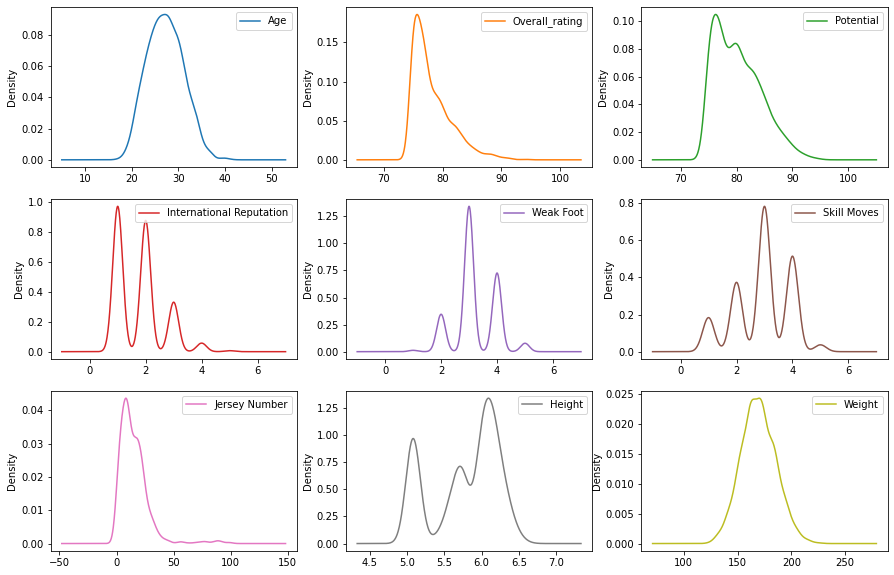

In [36]:
plt.rcParams["figure.figsize"] = [15,10]
fifa.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [37]:
fifa.skew()

Age                         0.197101
Overall_rating              1.370811
Potential                   0.673408
International Reputation    0.854724
Weak Foot                   0.069733
Skill Moves                -0.358327
Jersey Number               2.839025
Height                     -0.539604
Weight                      0.156247
dtype: float64

## Univariate Analysis

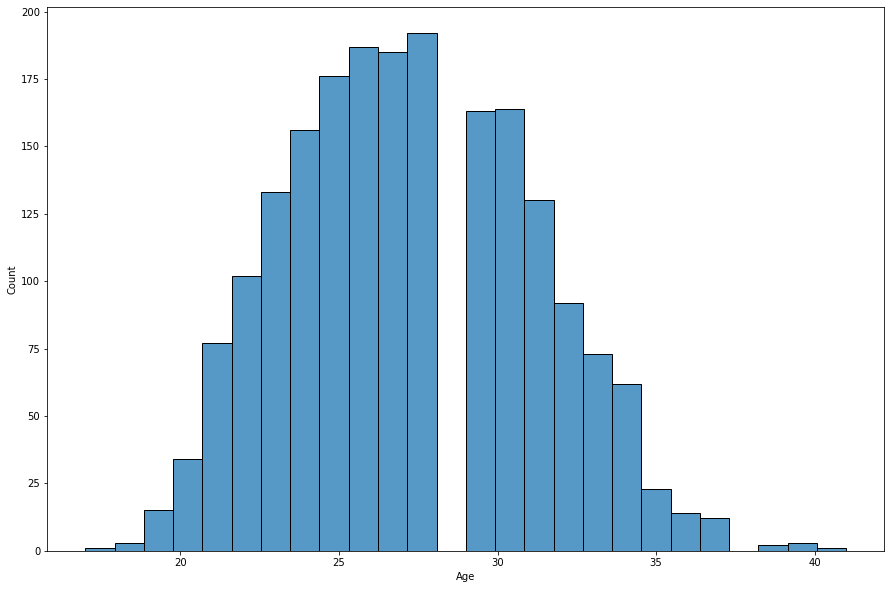

In [38]:
sns.histplot(fifa['Age'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

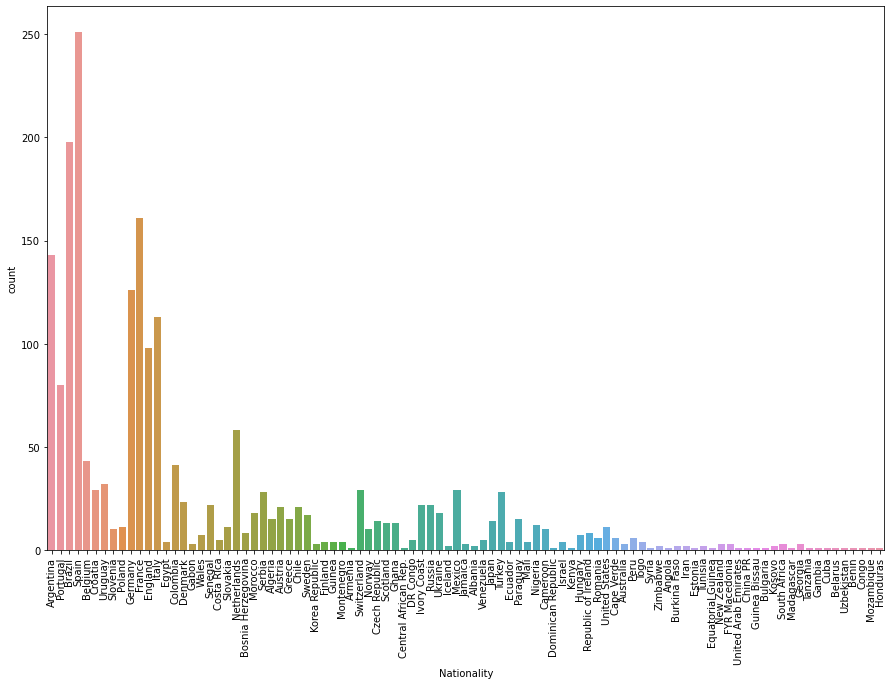

In [39]:
sns.countplot(fifa['Nationality'])
plt.xticks(rotation=90)
plt.show

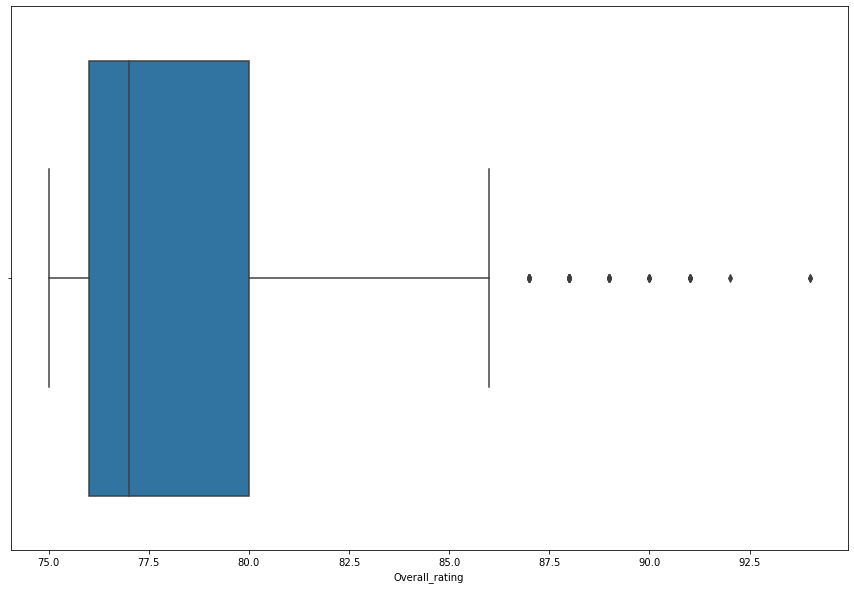

In [40]:
sns.boxplot(fifa['Overall_rating'])
plt.show()

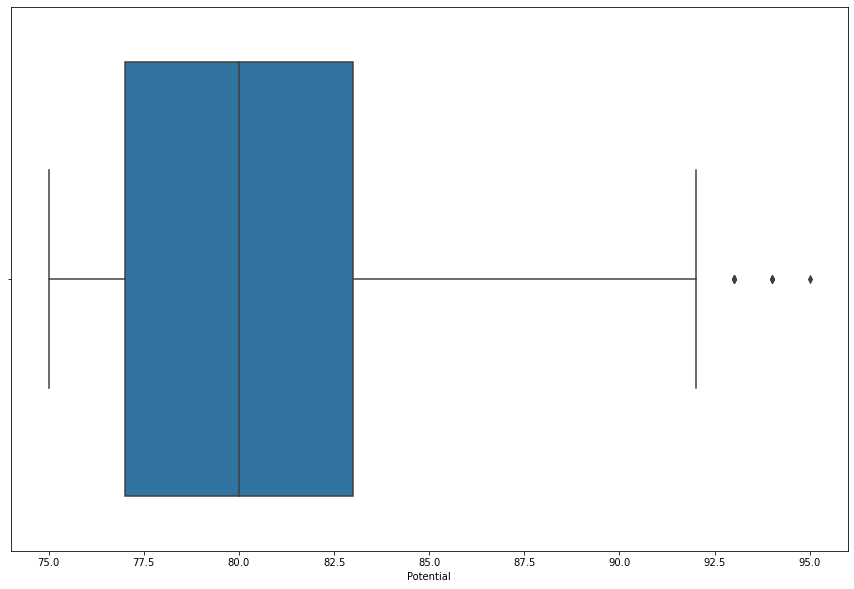

In [41]:
sns.boxplot(fifa['Potential'])
plt.show()

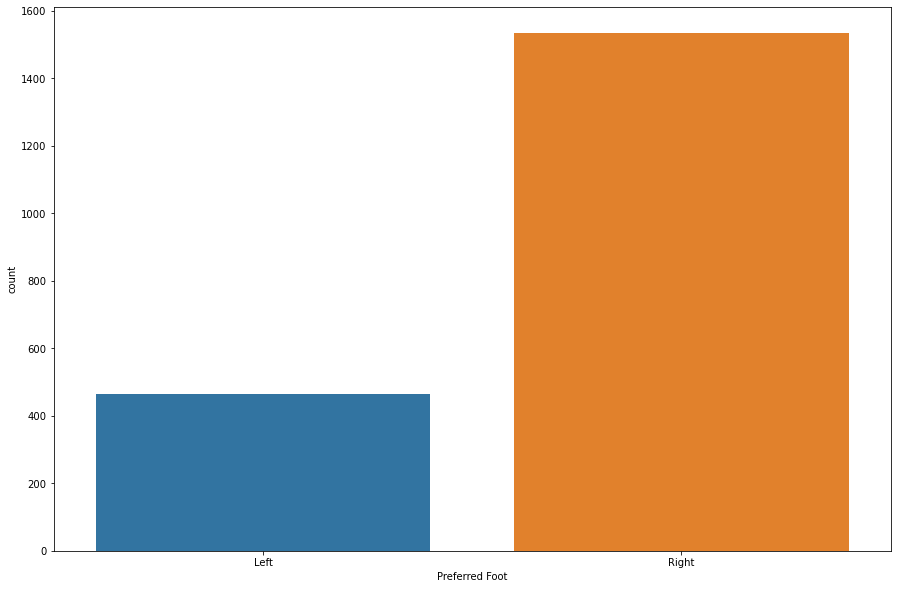

In [42]:
sns.countplot(fifa['Preferred Foot'])
plt.show()

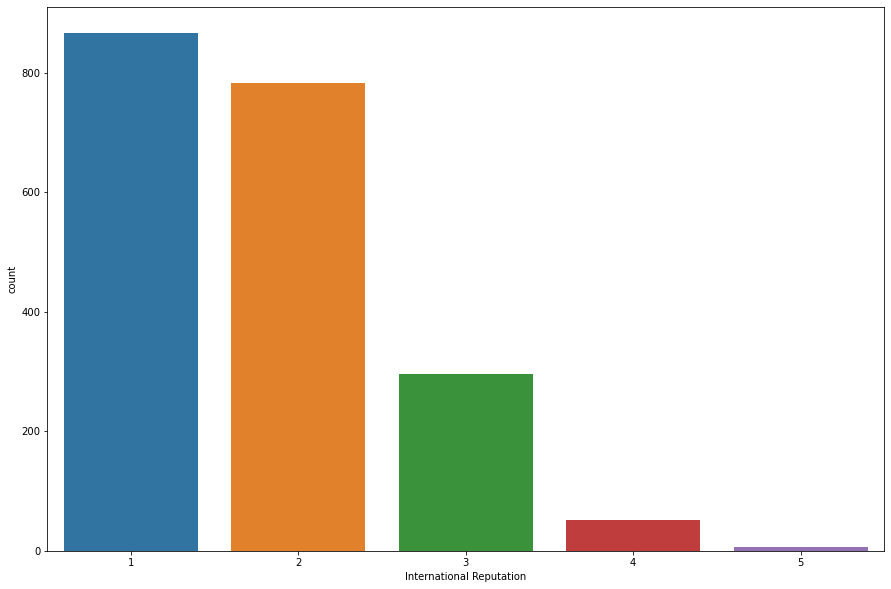

In [43]:
sns.countplot(fifa['International Reputation'])
plt.show()

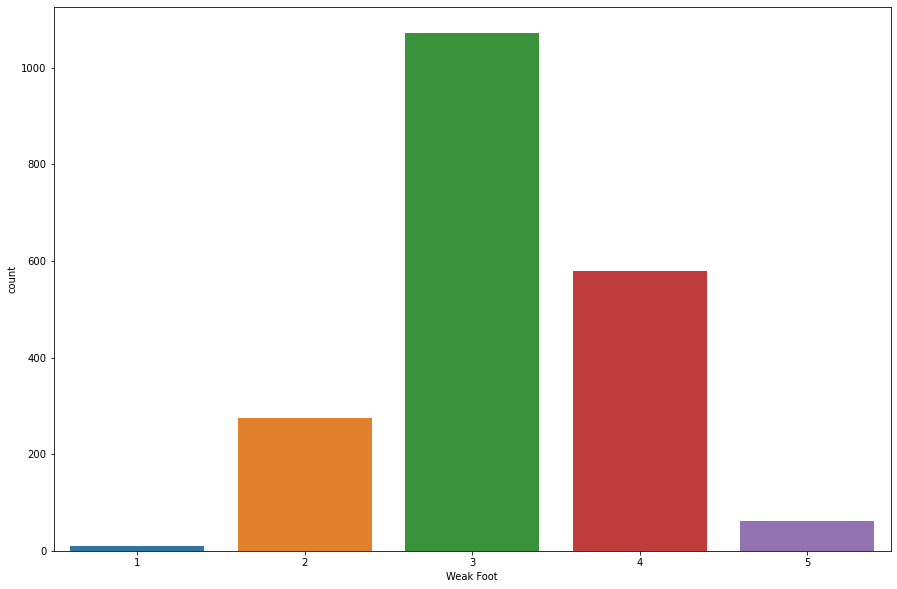

In [44]:
sns.countplot(fifa['Weak Foot'])
plt.show()

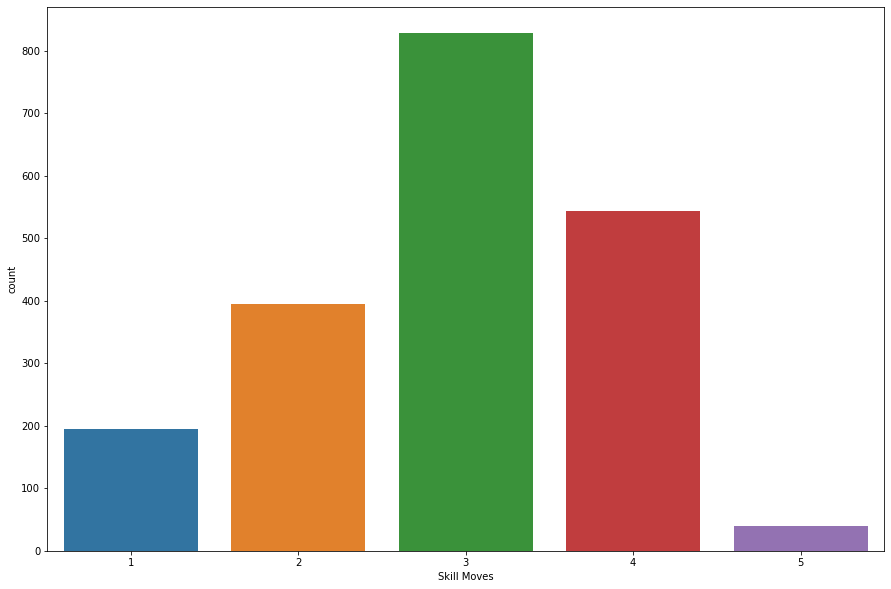

In [45]:
sns.countplot(fifa['Skill Moves'])
plt.show()

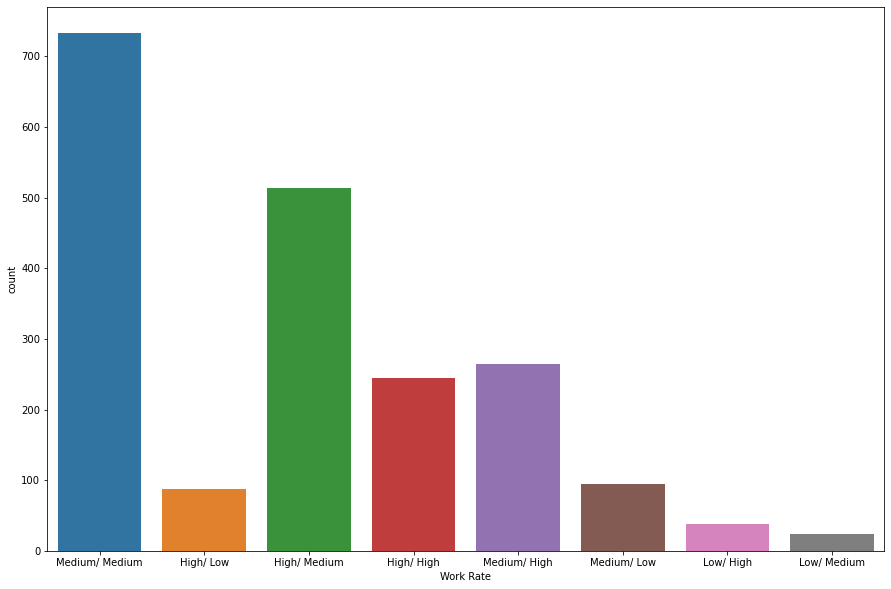

In [46]:
sns.countplot(fifa['Work Rate'])
plt.show()

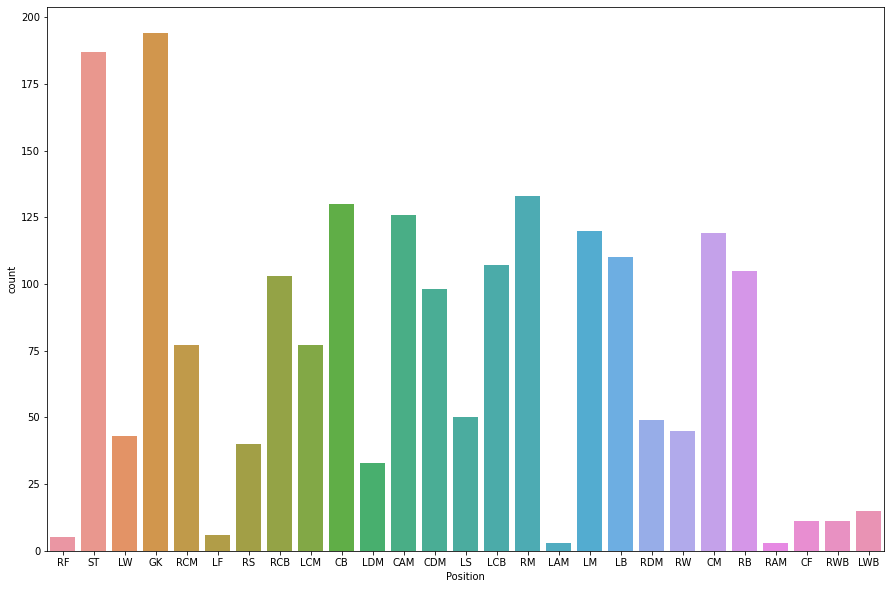

In [47]:
sns.countplot(fifa['Position'])
plt.show()

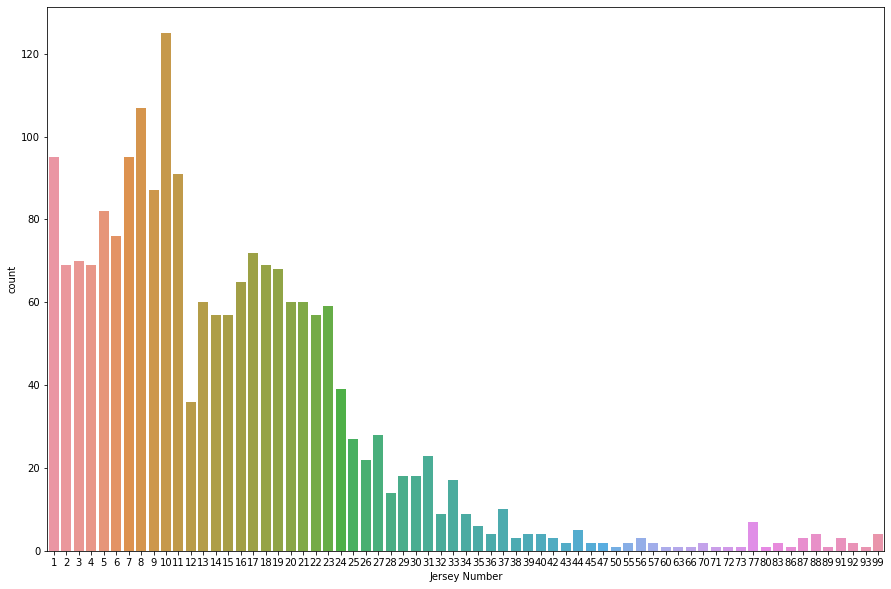

In [48]:
sns.countplot(fifa['Jersey Number'])
plt.show()

# Bivariate Analysis

In [49]:
fifa.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183


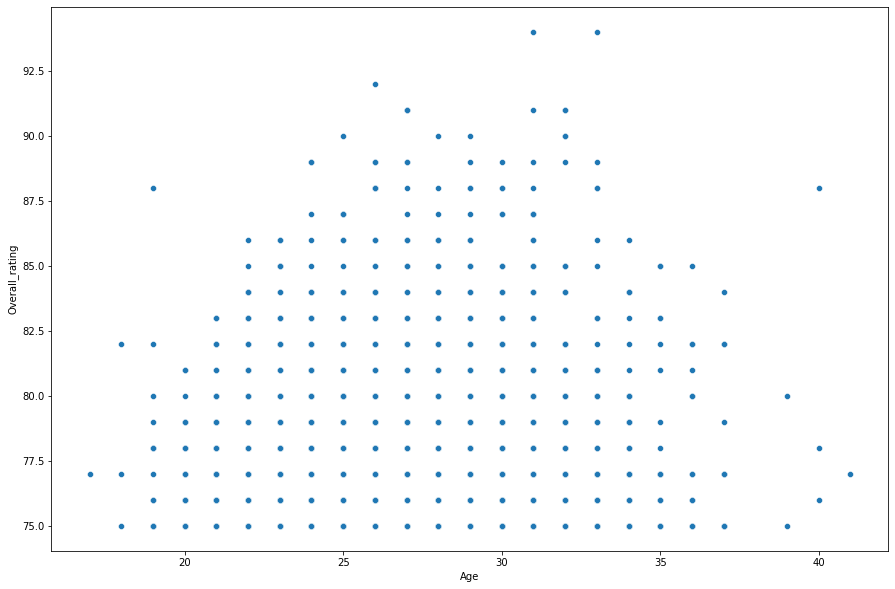

In [50]:
sns.scatterplot(fifa['Age'],fifa['Overall_rating'])
plt.show()

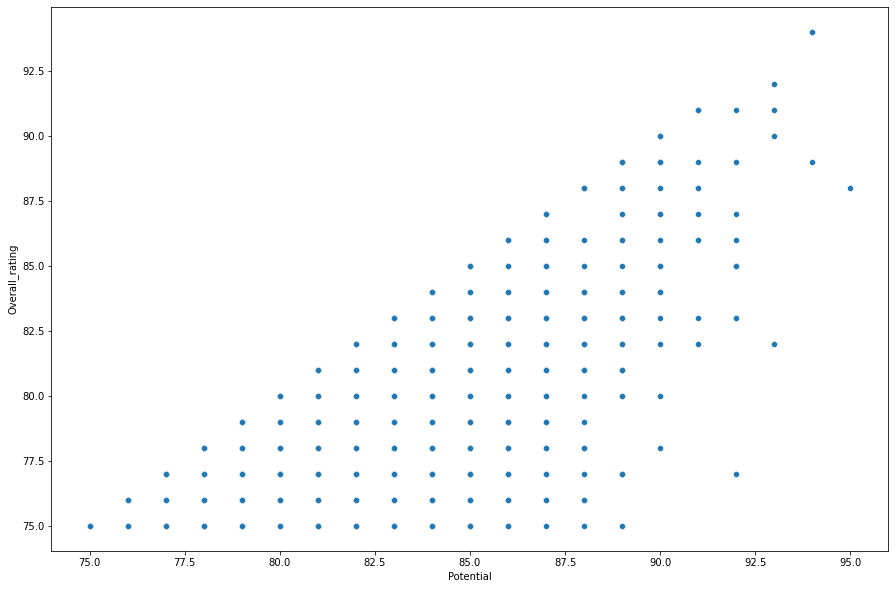

In [51]:
sns.scatterplot(fifa['Potential'],fifa['Overall_rating'])
plt.show()

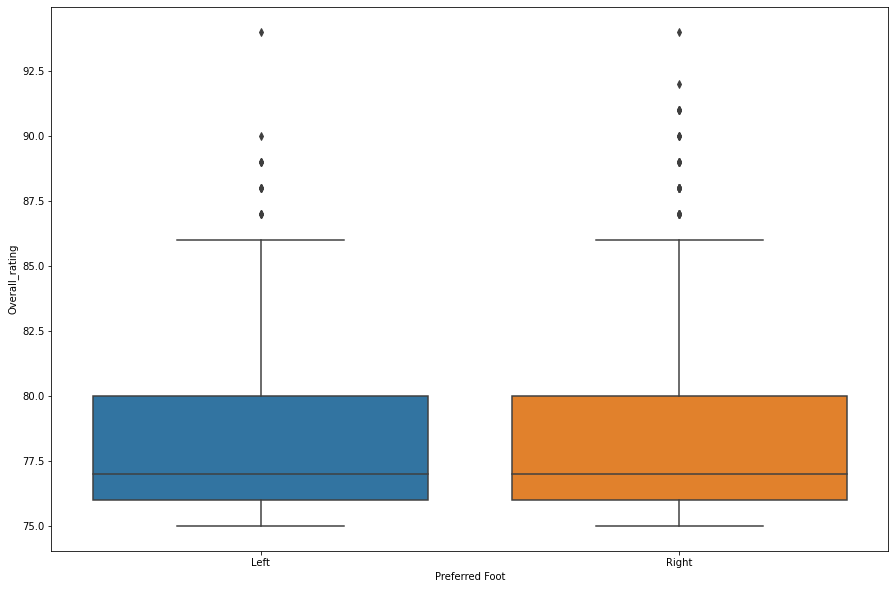

In [52]:
sns.boxplot(fifa['Preferred Foot'],fifa['Overall_rating'])
plt.show()

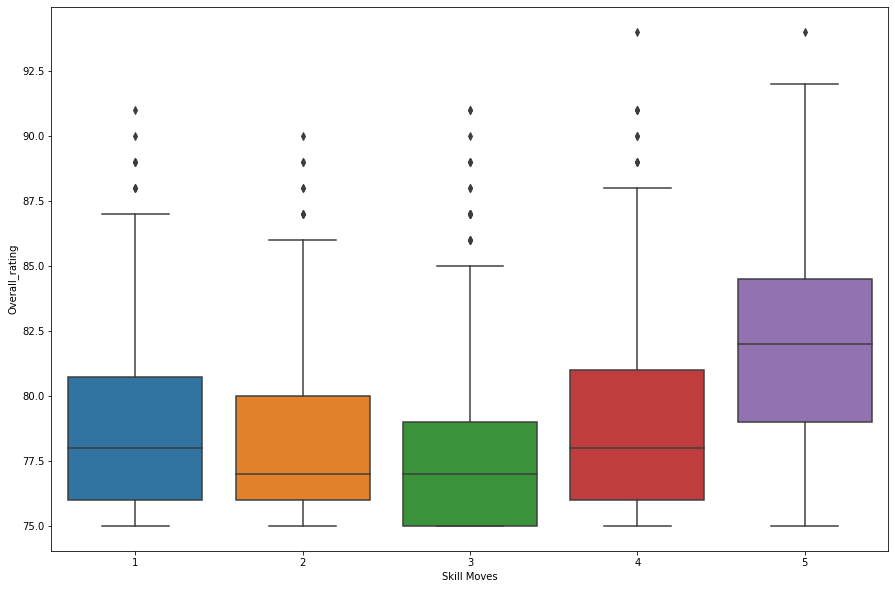

In [53]:
sns.boxplot(fifa['Skill Moves'],fifa['Overall_rating'])
plt.show()

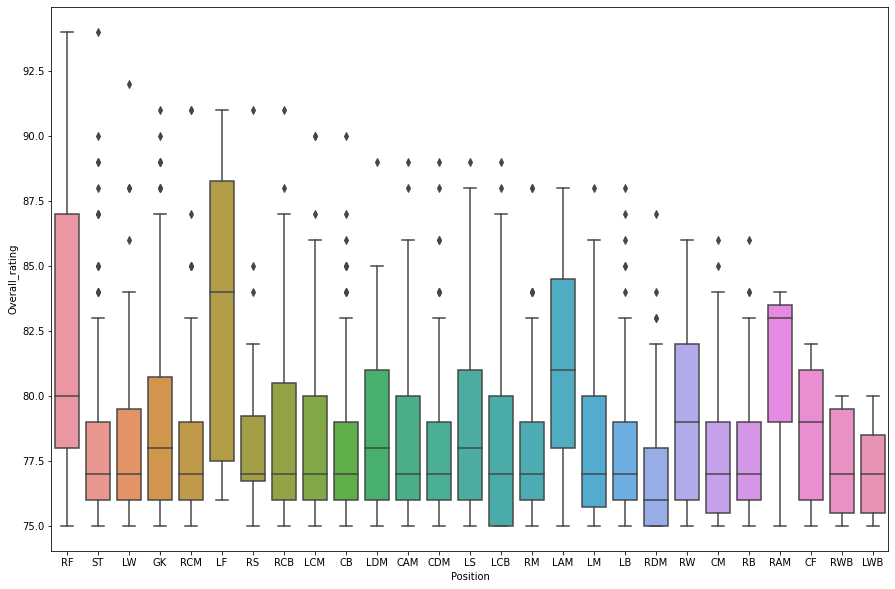

In [54]:
sns.boxplot(fifa['Position'],fifa['Overall_rating'])
plt.show()

# Null Value Treatment

In [55]:
fifa.isnull().sum()/len(fifa)

Name                        0.0000
Age                         0.0000
Nationality                 0.0000
Overall_rating              0.0000
Potential                   0.0000
Club                        0.0095
Preferred Foot              0.0000
International Reputation    0.0000
Weak Foot                   0.0000
Skill Moves                 0.0000
Work Rate                   0.0000
Position                    0.0000
Jersey Number               0.0000
Height                      0.0000
Weight                      0.0000
dtype: float64

In [56]:
fifa[fifa['Club'].isnull()]

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
452,L. Paredes,24,Argentina,80,85,NaN,Right,2,4,4,Medium/ Medium,CM,5,5.083333,165
538,A. Granqvist,33,Sweden,80,80,NaN,Right,2,4,2,High/ Medium,LCB,4,6.333333,185
568,A. Lunev,26,Russia,79,81,NaN,Right,1,3,1,Medium/ Medium,GK,12,6.166667,176
677,I. Smolnikov,29,Russia,79,79,NaN,Right,2,3,3,High/ High,RB,2,5.083333,154
874,A. Dzyuba,29,Russia,78,78,NaN,Right,2,3,3,High/ Medium,ST,22,6.416667,201
953,LuÃ­s Neto,30,Portugal,77,77,NaN,Right,1,3,2,Medium/ Medium,CB,4,6.166667,157
997,D. Kuzyaev,25,Russia,77,80,NaN,Right,1,3,3,Medium/ High,RM,7,6.000000,163
1008,G. Sio,29,Ivory Coast,77,77,NaN,Left,2,3,3,High/ Low,ST,21,5.083333,176
1120,J. Villar,41,Paraguay,77,77,NaN,Right,2,3,1,Medium/ Medium,GK,1,5.083333,187
1271,C. Riveros,35,Paraguay,76,76,NaN,Right,1,3,3,Medium/ Medium,CAM,16,5.083333,163


In [57]:
ctry=fifa[fifa['Club'].isnull()]['Nationality'].unique()

In [58]:
fifa['Club'].value_counts()

Chelsea                    24
Borussia Dortmund          23
Liverpool                  23
Napoli                     23
Manchester United          23
                           ..
Nagoya Grampus              1
Houston Dynamo              1
Legia Warszawa              1
Junior FC                   1
Real Sporting de GijÃ³n     1
Name: Club, Length: 285, dtype: int64

In [59]:
fifa[fifa['Nationality']=='Russia']['Club'].mode()

0    Lokomotiv Moscow
dtype: object

In [60]:
for i in ctry:
    print(i)
    print(fifa[fifa['Nationality']==i]['Club'].mode()[0])

Argentina
Boca Juniors
Sweden
Bologna
Russia
Lokomotiv Moscow
Portugal
SC Braga
Ivory Coast
1. FSV Mainz 05
Paraguay
Atlanta United
Hungary
RB Leipzig
South Africa
Amiens SC
Peru
Al Hilal
Slovenia
AS Saint-Ã‰tienne


In [61]:
for i in ctry:
    fifa['Club']=fifa['Club'].fillna(fifa[fifa['Nationality']==i]['Club'].mode()[0])

In [62]:
fifa.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

In [63]:
fifa[fifa['Name']=='L. Paredes']

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
452,L. Paredes,24,Argentina,80,85,Boca Juniors,Right,2,4,4,Medium/ Medium,CM,5,5.083333,165


In [64]:
Q1=fifa['Overall_rating'].quantile(0.25)
Q3=fifa['Overall_rating'].quantile(0.25)
IQR=Q3-Q1
print(IQR)
UB=Q3+(1.5*IQR)
print(UB)
LB=Q1-(1.5*IQR)
print(LB)

0.0
76.0
76.0


# Stats

Statistics Mini Project

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence that the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.

In [65]:
# a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean
# of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why 
# the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [66]:
import random

In [67]:
age_sample=fifa['Age'].sample(n=200,random_state=2)

In [68]:
print(shapiro(age_sample))

ShapiroResult(statistic=0.9885048270225525, pvalue=0.10730356723070145)


In [69]:
age_sample.skew()

0.053856642786600774

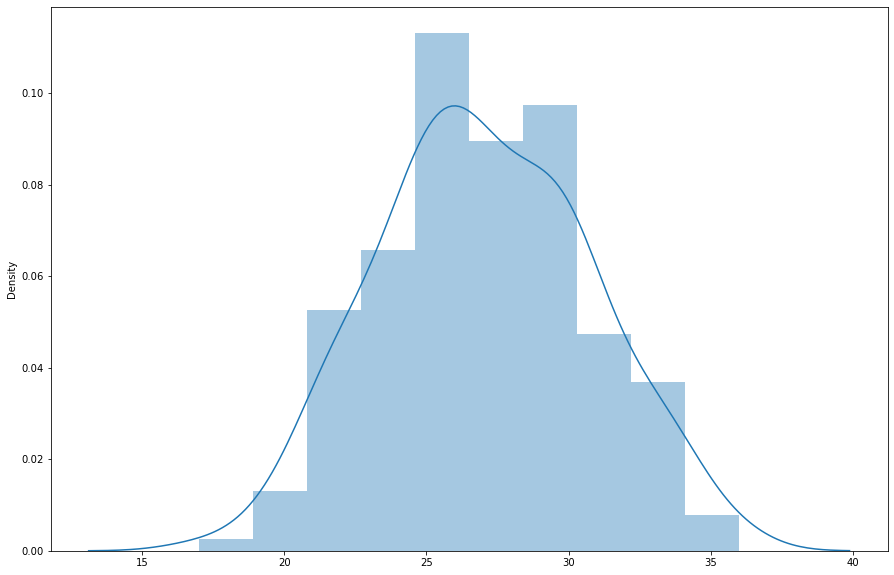

In [70]:
sns.distplot(x=age_sample)
plt.show()

In [71]:
print("Skewness before transformation:",age_sample.skew())
age_t=np.log(age_sample)
print("Skewness after transformation:",age_t.skew())

Skewness before transformation: 0.053856642786600774
Skewness after transformation: -0.2894974010683146


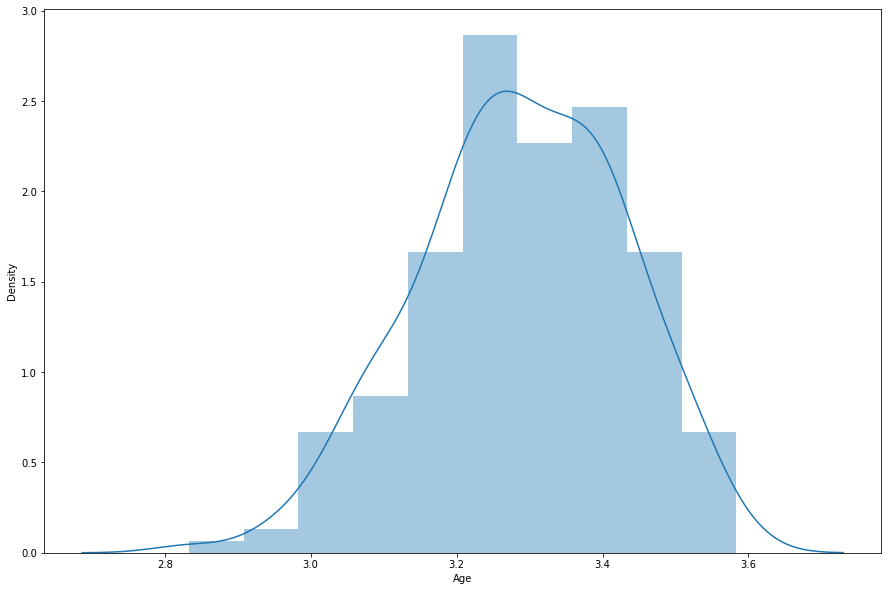

In [72]:
sns.distplot(age_t)
plt.show()

In [73]:
n=200
se=np.std(age_sample,ddof=1)/np.sqrt(n)
print("Sampling Error:",se)
print("Mean:",np.mean(age_sample))

Sampling Error: 0.26455993611844364
Mean: 27.04


In [74]:
print("Population Mean:",np.mean(fifa['Age']))
print("Standard Deviation:",np.std(fifa['Age'],ddof=1))

Population Mean: 27.2315
Standard Deviation: 3.8590612753574423


In [75]:
# As we will increase the size of sample, the standard error will decrease.

In [76]:
# b) Is there any evidence that the players overall rating is greater than 80?

The null and alternate hypothesis are given as:
    
H<sub>0</sub>: $\mu_{OR} \leq 80 $<br>
H<sub>1</sub>: $\mu_{OR} > 80 $

In [77]:
from scipy.stats import shapiro,levene

In [78]:
shapiro(fifa['Overall_rating'])

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

In [159]:
len(fifa[fifa['Overall_rating']>80])

412

In [168]:
mu=80
xbar=np.mean(fifa['Overall_rating'])
print("Sample Mean:",xbar)
sigma=np.std(fifa['Overall_rating'],ddof=1)
n=len(fifa['Overall_rating'])
se=sigma/np.sqrt(n)
print("Critical value:",stats.norm.isf(0.05,loc=mu,scale=se))
print("P Value:",1-stats.norm.cdf(xbar,loc=mu,scale=se))

Sample Mean: 78.197
Critical value: 80.12085807459493
P Value: 1.0


In [83]:
# c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical 
# analysis.

In [82]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2

The null and alternate hypothesis are given as:
    
H<sub>0</sub> Preferred foot and Potential are independent of each other.<br>
H<sub>1</sub>:Preferred foot and Potential are dependent on each other.

In [84]:
left=fifa[fifa['Preferred Foot']=='Left']['Potential']
right=fifa[fifa['Preferred Foot']=='Right']['Potential']
print(shapiro(left))
print(shapiro(right))
print(levene(left,right))
stat,pvalue=stats.ttest_ind(left,right)
print("Test statistic:",stat)
print("P-value",pvalue)
print("P-value is more than alpha. Hence we fail to reject null hypothesis.")
print("Preferred foot and Potential are independent of each other.")

ShapiroResult(statistic=0.9422042369842529, pvalue=1.717341763587954e-12)
ShapiroResult(statistic=0.9369121193885803, pvalue=5.342442151473519e-25)
LeveneResult(statistic=1.8561933767199223, pvalue=0.17321833707970302)
Test statistic: 1.5378037422592814
P-value 0.12425494914461453
P-value is more than alpha. Hence we fail to reject null hypothesis.
Preferred foot and Potential are independent of each other.


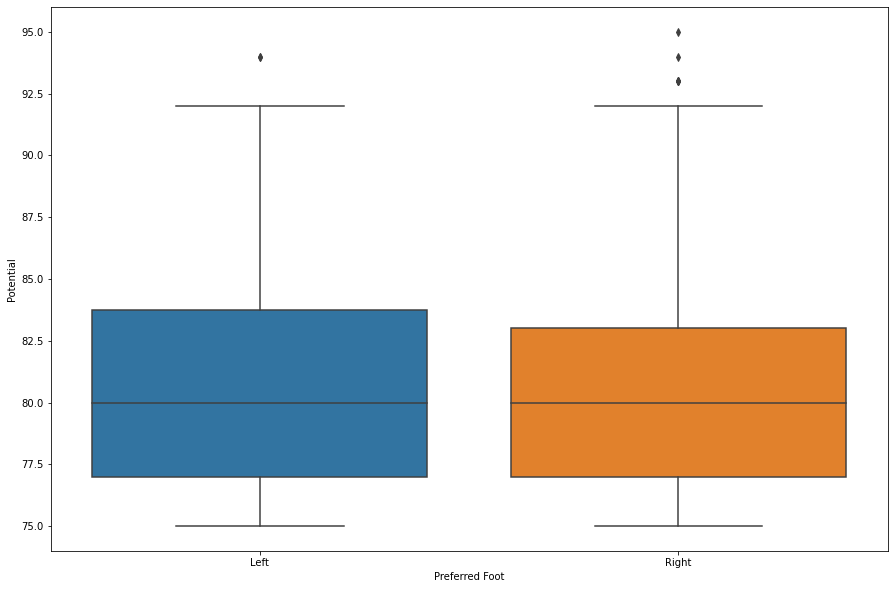

In [85]:
sns.boxplot(x=fifa['Preferred Foot'],y=fifa['Potential'])
plt.show()

In [86]:
# d) Perform the statistical test to identify the relation between the overall rating and potential. 
# [Assume both are continuous data points].

The null and alternate hypothesis are given as:
    
H<sub>0</sub>:Overall rating and Potential are related.<br>
H<sub>1</sub>:Overall rating and Potential are not related.

In [87]:
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [88]:
over=fifa['Overall_rating']
pot=fifa['Potential']
print(shapiro(over))
print(shapiro(pot))
print(levene(over,pot))
corr,pvalue=pearsonr(fifa['Overall_rating'],fifa['Potential'])
print("Correlation coefficient:",corr)
print("P-value:",pvalue)
print("Potential affects the Overall rating of the players as there is correlation of 0.73 which is close to 1.")

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)
ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)
LeveneResult(statistic=141.9704137312041, pvalue=3.4406841059319607e-32)
Correlation coefficient: 0.7326945574179919
P-value: 0.0
Potential affects the Overall rating of the players as there is correlation of 0.73 which is close to 1.


In [89]:
# e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

The null and alternate hypothesis are given as:
    
H<sub>0</sub>:Skill moves have no effect on the Overall Rating.<br>
H<sub>1</sub>:Skill moves affect the Overall Rating.

In [90]:
pd.crosstab(fifa['Skill Moves'],fifa['Overall_rating'])

Overall_rating,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94
Skill Moves,,,,,,,,,,,,,,,,,,,
1,38,32,23,15,19,18,5,12,13,7,2,1,1,3,3,1,1,0,0
2,96,78,63,30,24,25,13,20,10,10,12,6,3,2,2,1,0,0,0
3,219,171,138,64,72,56,28,24,17,11,9,4,7,2,3,1,2,0,0
4,74,92,75,59,52,41,43,34,27,13,8,9,1,7,3,2,3,0,1
5,2,0,5,0,4,3,4,4,3,4,2,2,1,3,0,0,0,1,1


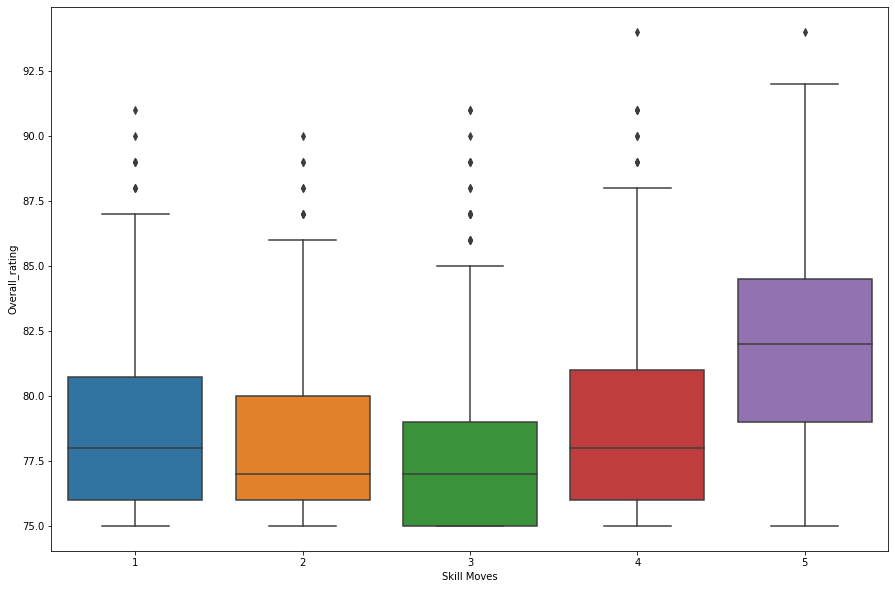

In [91]:
sns.boxplot(fifa['Skill Moves'],fifa['Overall_rating'])
plt.show()

In [92]:
one=fifa[fifa['Skill Moves']==1]['Overall_rating']
two=fifa[fifa['Skill Moves']==2]['Overall_rating']
three=fifa[fifa['Skill Moves']==3]['Overall_rating']
four=fifa[fifa['Skill Moves']==4]['Overall_rating']
five=fifa[fifa['Skill Moves']==5]['Overall_rating']
print(shapiro(one))
print(shapiro(two))
print(shapiro(three))
print(shapiro(four))
print(shapiro(five))
print(levene(one,two,three,four,five))
stat,pvalue=f_oneway(one,two,three,four,five)
print("Test statistic:",stat)
print("P-value",pvalue)
print("P-value is less than alpha. Hence we reject null hypothesis.")
print("Skill moves affect the overall rating of the player.")

ShapiroResult(statistic=0.877423107624054, pvalue=1.8515081828818225e-11)
ShapiroResult(statistic=0.8366187810897827, pvalue=9.018591891126539e-20)
ShapiroResult(statistic=0.816904604434967, pvalue=1.1966492618602507e-29)
ShapiroResult(statistic=0.89353346824646, pvalue=5.833666454611851e-19)
ShapiroResult(statistic=0.9650622010231018, pvalue=0.2619292140007019)
LeveneResult(statistic=9.982774544928226, pvalue=5.345915558006616e-08)
Test statistic: 31.085141826531746
P-value 3.8236370526660514e-25
P-value is less than alpha. Hence we reject null hypothesis.
Skill moves affect the overall rating of the player.


# 2.

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a)	With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.
b)	Perform statistical analysis to check whether the networks are equally distributed in the dataset.
c)	Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.
d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.
e)	Perform statistical tests to identify the relation between network and network_type. 
Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.


# Reading the Data

In [93]:
df=pd.read_csv('D://Supernatural//D//Statistics//Stats_mini//Stats_mini//Set-A//phone.csv')

In [94]:
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [95]:
df.shape

(820, 6)

# Understanding the categorical and numerical variables

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [97]:
df['date']

0       15-10-14 6:58
1       15-10-14 6:58
2      15-10-14 14:46
3      15-10-14 14:48
4      15-10-14 17:27
            ...      
815     10-03-15 6:58
816     11-03-15 6:58
817     12-03-15 6:58
818     13-03-15 0:39
819     13-03-15 6:58
Name: date, Length: 820, dtype: object

In [98]:
df['date']=pd.to_datetime(df['date'],yearfirst=True)
df['date']

0     2015-10-14 06:58:00
1     2015-10-14 06:58:00
2     2015-10-14 14:46:00
3     2015-10-14 14:48:00
4     2015-10-14 17:27:00
              ...        
815   2010-03-15 06:58:00
816   2011-03-15 06:58:00
817   2012-03-15 06:58:00
818   2013-03-15 00:39:00
819   2013-03-15 06:58:00
Name: date, Length: 820, dtype: datetime64[ns]

In [99]:
df.drop('month',axis=1,inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          820 non-null    datetime64[ns]
 1   duration      820 non-null    float64       
 2   item          820 non-null    object        
 3   network       820 non-null    object        
 4   network_type  820 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 32.2+ KB


In [101]:
cat=df.select_dtypes(include='object').columns
print("There are",len(cat),"categorical columns:",list(cat))

There are 3 categorical columns: ['item', 'network', 'network_type']


In [102]:
num=df.select_dtypes(include='number').columns
print("There are",len(num),"numerical columns:",list(num))

There are 1 numerical columns: ['duration']


In [103]:
df.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


# For checking how many unique values each variable contains

In [104]:
df.nunique()

date            738
duration        820
item              3
network           7
network_type      4
dtype: int64

# Checking the null values in the dataset

In [105]:
df.isnull().sum()

date            0
duration        0
item            0
network         0
network_type    0
dtype: int64

# Measures of Central Tendency

In [106]:
df.mean()

duration    144.304936
dtype: float64

In [107]:
df.median()

duration    144.179434
dtype: float64

In [108]:
df.mode().head(1)

,date,duration,item,network,network_type
0,2016-01-15 18:07:00,0.993514,call,Three,mobile


# Measures of Dispersion

In [109]:
df[num].max()

duration    268.45809
dtype: float64

In [110]:
df[num].mean()

duration    144.304936
dtype: float64

In [111]:
df[num].max()-df[num].mean()

duration    124.153155
dtype: float64

In [112]:
df[num].var()

duration    2087.372951
dtype: float64

In [113]:
df[num].std()

duration    45.687777
dtype: float64

In [114]:
Q1=np.quantile(df[num],0.25)
Q3=np.quantile(df[num],0.75)
IQR=Q3-Q1
IQR

63.01582140249997

In [115]:
from scipy.stats import variation  
for i in df[num]:
    print(i,":", scipy.stats.variation(df[i],nan_policy='omit'))

duration : 0.31641266980559407


# Getting count of all the columns in the data

In [116]:
df.head()

,date,duration,item,network,network_type
0,2015-10-14 06:58:00,221.321120,data,data,data
1,2015-10-14 06:58:00,81.610599,call,Vodafone,mobile
2,2015-10-14 14:46:00,143.109111,call,Meteor,mobile
3,2015-10-14 14:48:00,111.888670,call,Tesco,mobile
4,2015-10-14 17:27:00,246.695171,call,Tesco,mobile


In [117]:
df['date'].value_counts()

2016-01-15 18:07:00    6
2030-12-14 12:05:00    4
2002-02-15 17:35:00    4
2027-12-14 22:30:00    4
2017-10-14 17:44:00    3
                      ..
2003-03-15 10:12:00    1
2005-12-14 06:58:00    1
2025-11-14 06:58:00    1
2019-12-14 10:14:00    1
2017-12-14 23:26:00    1
Name: date, Length: 738, dtype: int64

In [118]:
df['network'].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [119]:
df['network_type'].value_counts()

mobile       601
data         150
landline      42
voicemail     27
Name: network_type, dtype: int64

# Distribution of Data

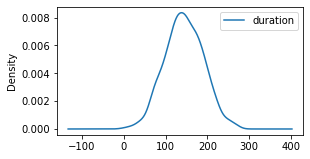

In [120]:
plt.rcParams['figure.figsize']=[15,8]
df[num].plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

In [121]:
df.skew()

duration    0.005764
dtype: float64

# Univariate Analysis

In [122]:
df.head(2)

,date,duration,item,network,network_type
0,2015-10-14 06:58:00,221.321120,data,data,data
1,2015-10-14 06:58:00,81.610599,call,Vodafone,mobile


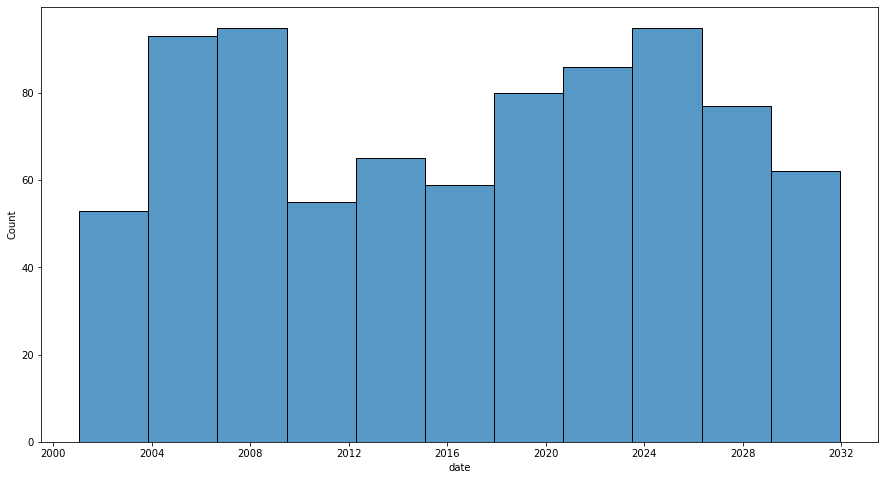

In [123]:
sns.histplot(df['date'])
plt.show()

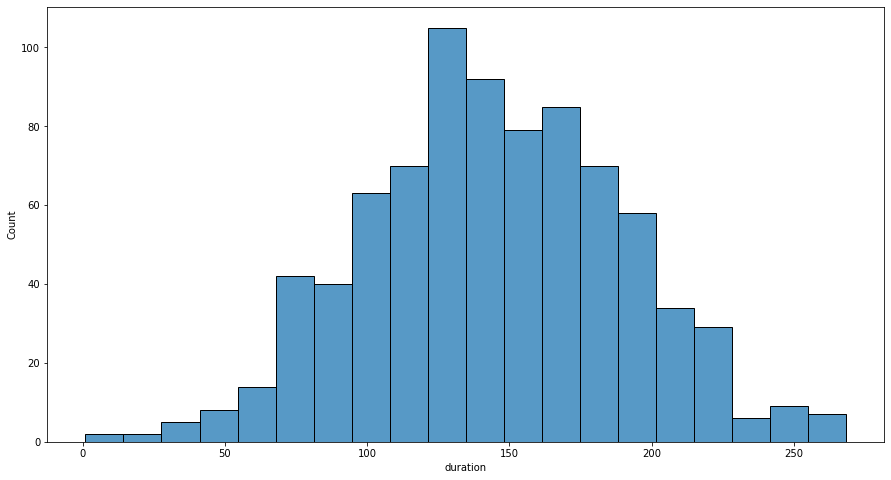

In [124]:
sns.histplot(df['duration'])
plt.show()

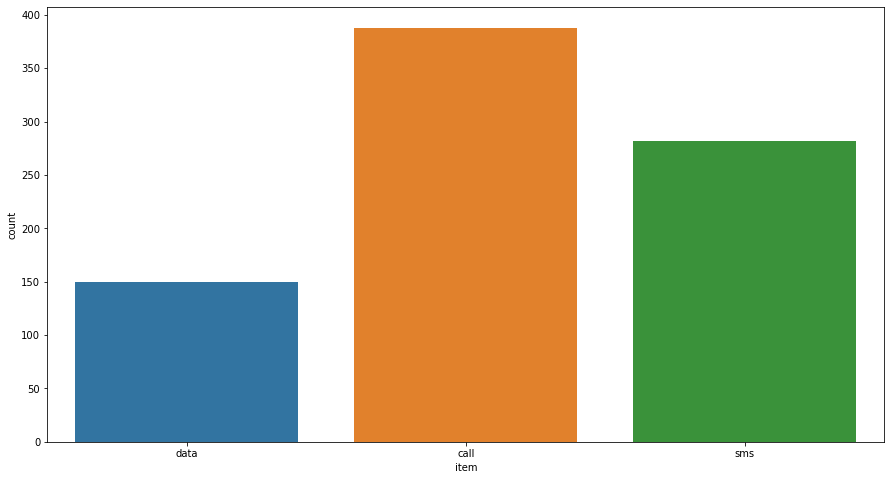

In [125]:
sns.countplot(df['item'])
plt.show()

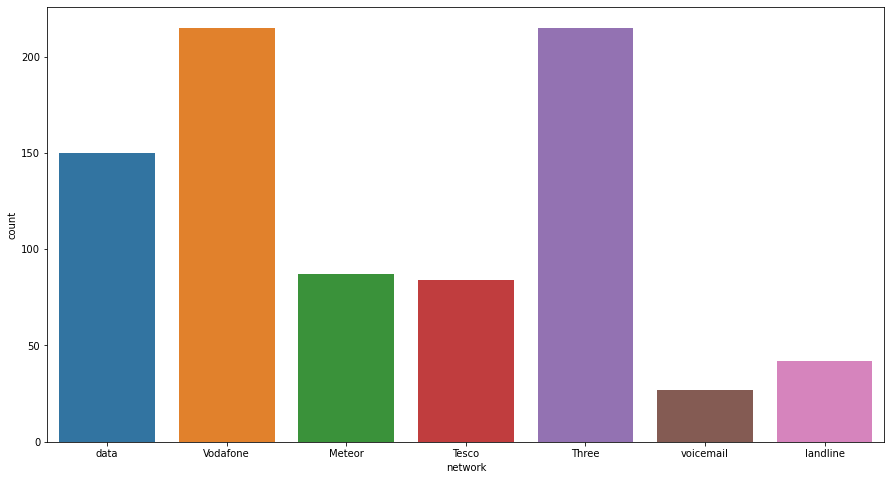

In [126]:
sns.countplot(df['network'])
plt.show()

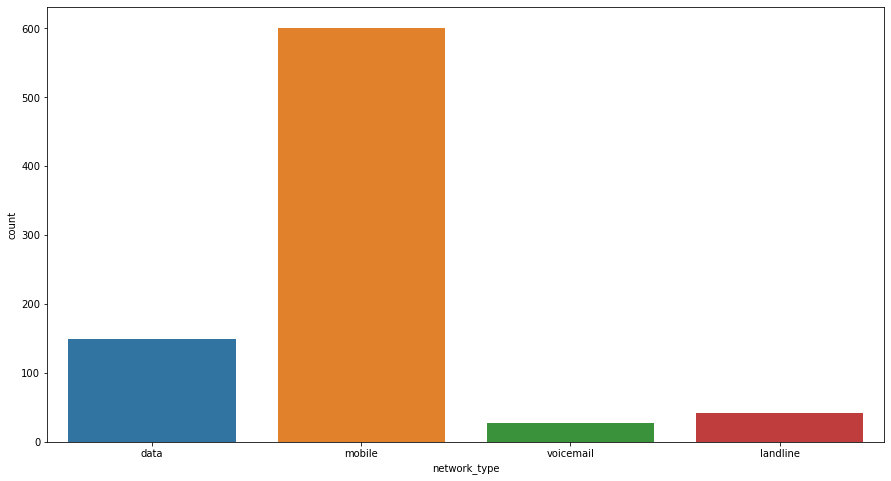

In [127]:
sns.countplot(df['network_type'])
plt.show()

# Bivariate Analysis

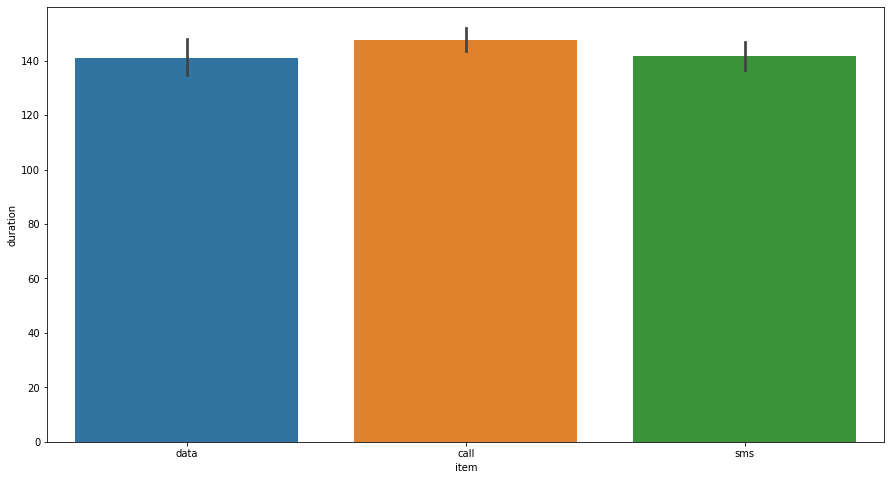

In [128]:
sns.barplot(df['item'],df['duration'])
plt.show()

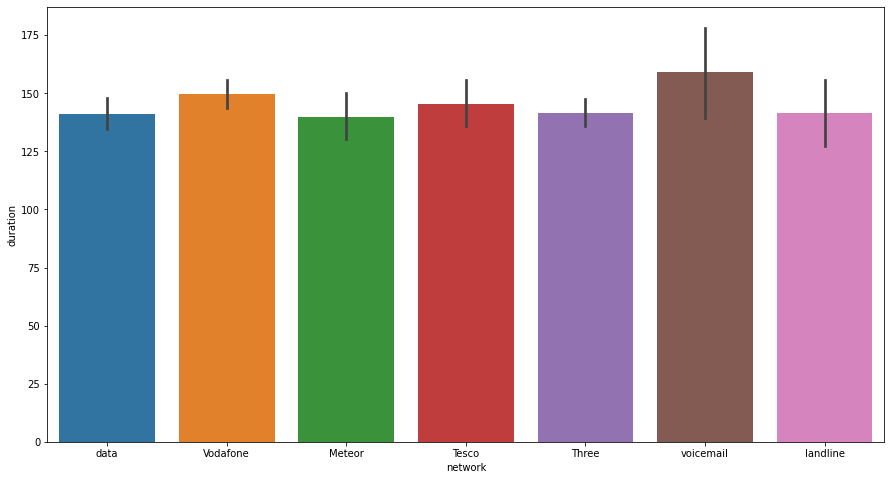

In [129]:
sns.barplot(df['network'],df['duration'])
plt.show()

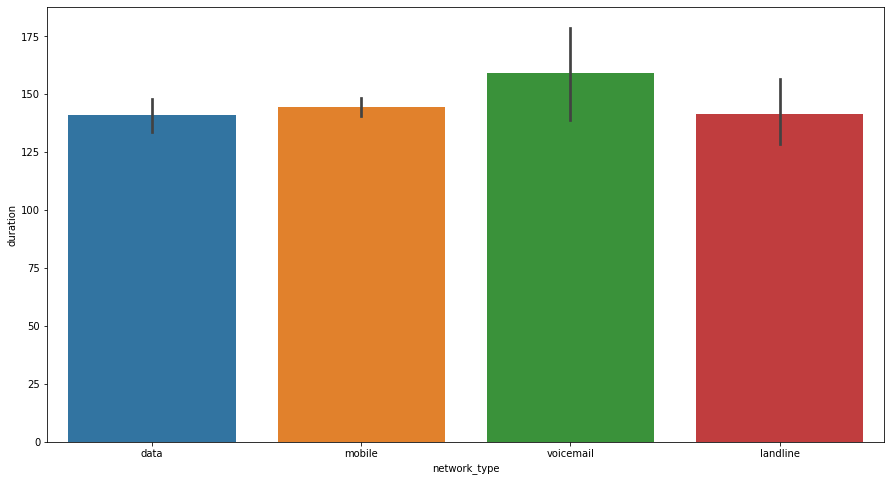

In [130]:
sns.barplot(df['network_type'],df['duration'])
plt.show()

In [131]:
pd.crosstab(df['item'],df['network'])

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
item,,,,,,,
call,54,71,128,66,0,42,27
data,0,0,0,0,150,0,0
sms,33,13,87,149,0,0,0


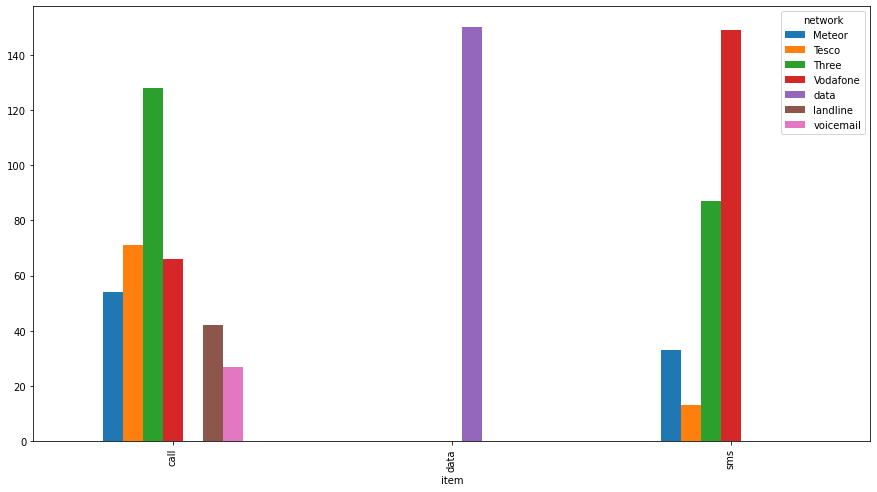

In [132]:
pd.crosstab(df['item'],df['network']).plot(kind='bar')
plt.show()

In [133]:
pd.crosstab(df['item'],df['network_type'])

network_type,data,landline,mobile,voicemail
item,,,,
call,0,42,319,27
data,150,0,0,0
sms,0,0,282,0


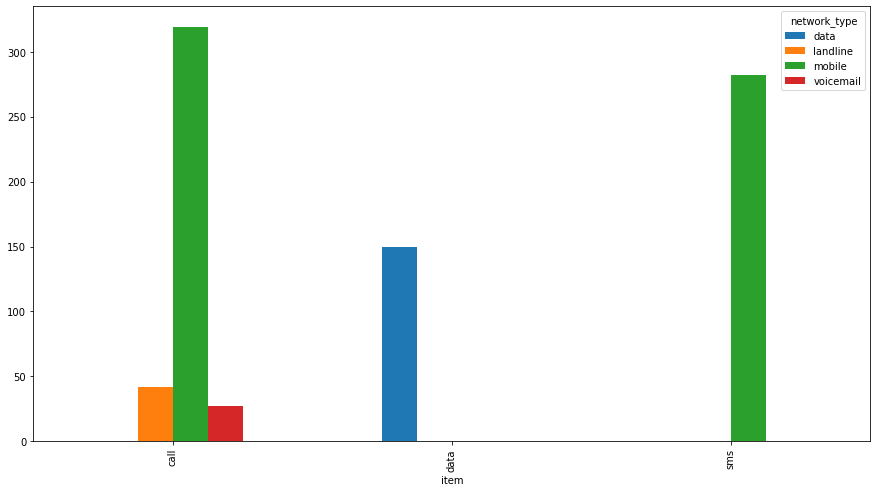

In [134]:
pd.crosstab(df['item'],df['network_type']).plot(kind='bar')
plt.show()

In [135]:
pd.crosstab(df['network'],df['network_type'])

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


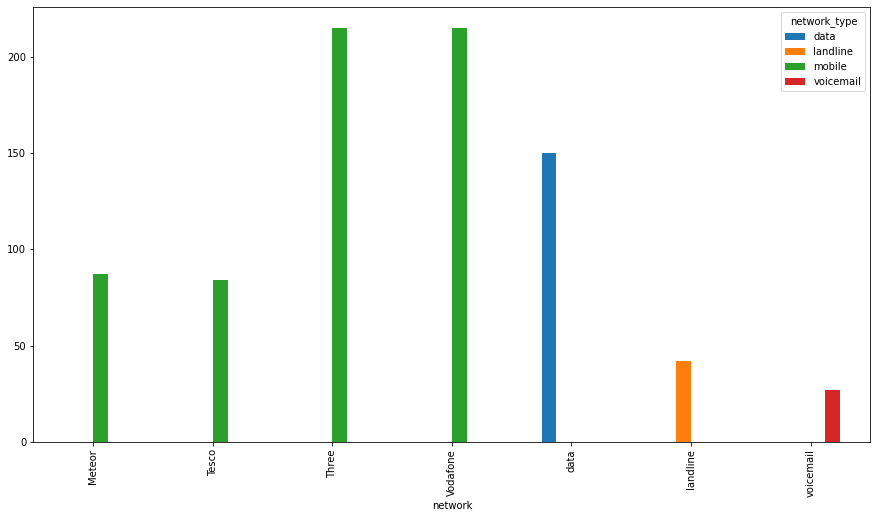

In [136]:
pd.crosstab(df['network'],df['network_type']).plot(kind='bar')
plt.show()

# Stats

In [137]:
# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the 
# Intervals are wider? Interpret the results.

In [138]:
n=len(df['duration'])
xbar=np.mean(df['duration'])
sigma=np.std(df['duration'],ddof=1)
se=sigma/np.sqrt(n)
print("Confidence Interval:",stats.norm.interval(0.95,loc=xbar,scale=se))
UL=stats.norm.isf(0.025,loc=xbar,scale=se)
LL=stats.norm.isf(0.975,loc=xbar,scale=se)
print("Difference:",UL-LL)

Confidence Interval: (141.1778397288302, 147.4320313908407)
Difference: 6.2541916620104985


In [139]:
n=len(df['duration'])
xbar=np.mean(df['duration'])
sigma=np.std(df['duration'],ddof=1)
se=sigma/np.sqrt(n)
print("Confidence Interval:",stats.norm.interval(0.99,loc=xbar,scale=se))
UL=stats.norm.isf(0.005,loc=xbar,scale=se)
LL=stats.norm.isf(0.995,loc=xbar,scale=se)
print("Difference:",UL-LL)

Confidence Interval: (140.19523500408818, 148.41463611558274)
Difference: 8.219401111494562


* 99% confidence interval has wider interval as the difference between UL and LL is 8.2 which is higher than that of 95% CI which is 6.25.

In [140]:
# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset

The null and alternate hypothesis are given as:
    
H<sub>0</sub>:The networks are equally distributed. <br>
H<sub>1</sub>:The networks are not equally distributed.

In [141]:
print(len(df['network']))
three=len(df[df['network']=='Three'])
voda=len(df[df['network']=='Vodafone'])
data=len(df[df['network']=='data'])
met=len(df[df['network']=='Meteor'])
tes=len(df[df['network']=='Tesco'])
land=len([df['network']=='landline'])
voice=len(df[df['network']=='voicemail'])
observed_value=[three,voda,data,met,tes,land,voice]
print(observed_value)
expected_value=np.array([(np.mean(observed_value))]*7)
print(expected_value)
stat,pvalue=chisquare(f_obs=observed_value,f_exp=expected_value)
print("Test-statistic:",stat)
print("P-value:",pvalue)
print("As P-value is extremely small than alpha, we can say that the networks are not equally distributed in the dataset.")

820
[215, 215, 150, 87, 84, 1, 27]
[111.28571429 111.28571429 111.28571429 111.28571429 111.28571429
 111.28571429 111.28571429]
Test-statistic: 391.9050064184852
P-value: 1.5367858430249985e-81
As P-value is extremely small than alpha, we can say that the networks are not equally distributed in the dataset.


In [142]:
# c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

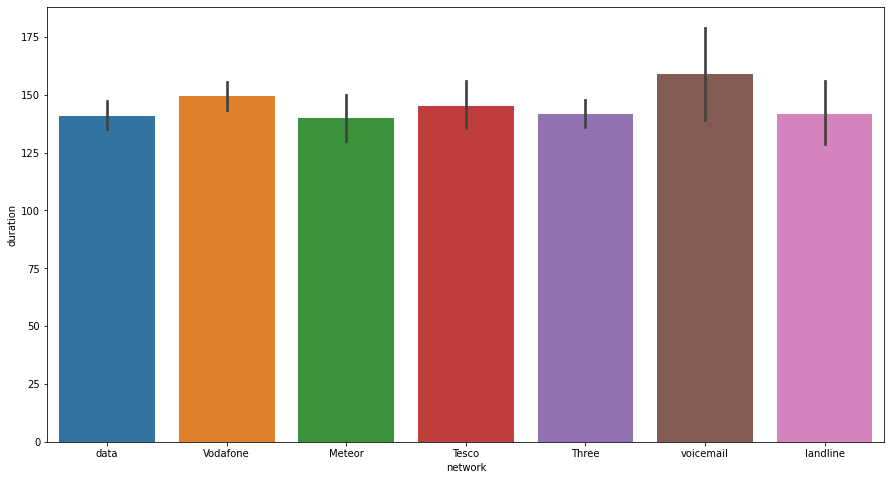

In [143]:
sns.barplot(df['network'],df['duration'])
plt.show()

In [144]:
# 1)According to the graph, the duration of voicemail is highest on an average  and the duration of Tesco, Three , Vodafone,data 
#and landline are almost the same.
# 2)The duration of Meteor is least of all but still there isn't not much noticable different according to the graph.

In [145]:
df.groupby('network')['duration'].mean()

network
Meteor       139.757012
Tesco        145.287504
Three        141.457941
Vodafone     149.606272
data         140.968643
landline     141.617641
voicemail    159.073841
Name: duration, dtype: float64

In [146]:
df['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [170]:
voda=df[df['network']=='Vodafone']['duration']
three=df[df['network']=='Three']['duration']
data=df[df['network']=='data']['duration']
met=df[df['network']=='Meteor']['duration']
tes=df[df['network']=='Tesco']['duration']
voice=df[df['network']=='voicemail']['duration']
land=df[df['network']=='landline']['duration']
print(f_oneway(voda,three,data,met,tes,voice,land))
print("P-value more than alpha. Hence we fail to reject null hypothesis. The network and duration are independent of each other.")

F_onewayResult(statistic=1.403649779200122, pvalue=0.2102939953009413)
P-value more than alpha. Hence we fail to reject null hypothesis. The network and duration are independent of each other.


In [148]:
# d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the 
# classes is required.

The null and alternate hypothesis are given as:
    
H<sub>0</sub>:The item and duration are independent.<br>
H<sub>1</sub>:The item and duration are dependent.

In [149]:
df['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [150]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [151]:
call=df[df['item']=='call']['duration']
sms=df[df['item']=='sms']['duration']
data=df[df['item']=='data']['duration']
print(shapiro(call))
print(shapiro(sms))
print(shapiro(data))
print(levene(call,sms,data))
f_oneway(call,sms,data)

ShapiroResult(statistic=0.9973040819168091, pvalue=0.7803040742874146)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)
ShapiroResult(statistic=0.9912641048431396, pvalue=0.4852308928966522)
LeveneResult(statistic=3.4300976447008424, pvalue=0.03285087780533987)


F_onewayResult(statistic=1.9313964906864993, pvalue=0.1456068656611744)

In [152]:
test = ols('duration ~ item', df).fit()
anova_1 = anova_lm(test, typ = 1)
print(anova_1)

             df        sum_sq      mean_sq         F    PR(>F)
item        2.0  8.044792e+03  4022.395964  1.931396  0.145607
Residual  817.0  1.701514e+06  2082.636053       NaN       NaN


In [153]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(data = df['duration'], groups = df['item'])
# tukey's range test
# pass the alpha value as 0.05 to get the 95% confidence interval 
post_hoc = comp.tukeyhsd(alpha = 0.05)
# print the summary table
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
call,data,-6.6347,0.2862,-16.9372,3.6678,False
call,sms,-6.0621,0.207,-14.4472,2.323,False
data,sms,0.5726,0.9,-10.2563,11.4015,False


In [154]:
# e) Perform statistical tests to identify the relation between network and network_type

The null and alternate hypothesis are given as:
    
H<sub>0</sub>:There's no relationship between network and network type.<br>
H<sub>1</sub>:There network and network type are related to each other.

In [155]:
table=pd.crosstab(df['network'],df['network_type'])
observed_values=table.values
test_stat,pvalue,ddof,expected=chi2_contingency(observed=observed_values)
print("Test-statistic:",test_stat)
print("P-value:",pvalue)
print("P-value is zero. There is no relationship between the network and network type")

Test-statistic: 2460.0
P-value: 0.0
P-value is zero. There is no relationship between the network and network type
